In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
storm_data = pd.read_csv("https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/StormEvents_locations-ftp_v1.0_d2014_c20180718.csv")

golden_data = pd.read_csv("https://raw.githubusercontent.com/nikpocuca/sta2453-2022.github.io/master/kaggle_income_clean.csv")

In [4]:
clean_storm_df = storm_data[(storm_data.LATITUDE > 20.0) & (storm_data.LATITUDE < 50.0) & (storm_data.LONGITUDE > -140.0)]

clean_golden_data = golden_data[(golden_data.Lat > 20.0) & (golden_data.Lat < 50.0) & (golden_data.Lon > -140.0)]

In [12]:
poor_df = clean_golden_data[clean_golden_data.Mean < 25000].copy()

rich_df = clean_golden_data[clean_golden_data.Mean > 100000].copy()

In [13]:
# calculate the nearest points.
def calc_min_distance(golden_item):
  return np.min(
    110.574 * np.sqrt((clean_storm_df.LONGITUDE - golden_item.Lon) ** 2 + (clean_storm_df.LATITUDE - golden_item.Lat) ** 2)
)

In [24]:
rich_df.loc[:, "min_storm_distance"] = rich_df.apply(calc_min_distance, axis=1).to_numpy()
poor_df.loc[:, "min_storm_distance"] = poor_df.apply(calc_min_distance, axis=1).to_numpy()

X_rich = rich_df.min_storm_distance.to_numpy()
X_poor = poor_df.min_storm_distance.to_numpy()

X_rich_log = np.log(X_rich)
X_poor_log = np.log(X_poor)

(array([1.191e+03, 1.288e+03, 7.780e+02, 4.420e+02, 2.330e+02, 1.210e+02,
        9.000e+01, 6.400e+01, 4.400e+01, 3.300e+01, 1.800e+01, 1.700e+01,
        1.500e+01, 7.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([3.19205095e-02, 2.24855941e+00, 4.46519831e+00, 6.68183721e+00,
        8.89847610e+00, 1.11151150e+01, 1.33317539e+01, 1.55483928e+01,
        1.77650317e+01, 1.99816706e+01, 2.21983095e+01, 2.44149484e+01,
        2.66315873e+01, 2.88482262e+01, 3.10648651e+01, 3.32815040e+01,
        3.54981429e+01, 3.77147818e+01, 3.99314207e+01, 4.21480596e+01,
        4.436469

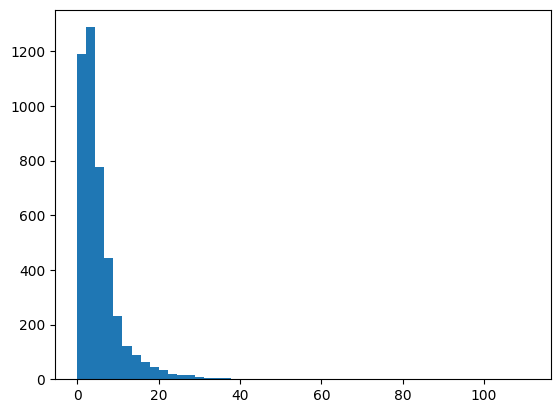

In [20]:
# plot rich people histogram, make bins at least 50, comment on the plot.
plt.hist(X_rich, bins=50)

/tmp/ipykernel_21744/766273851.py:2: RuntimeWarning: invalid value encountered in log
  plt.hist(np.log(X_rich_log), bins=50)


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   2.,   1.,   4.,
          4.,   4.,   4.,   2.,   7.,   8.,   8.,   9.,  13.,  16.,  20.,
         25.,  41.,  62.,  60.,  97., 107., 143., 206., 281., 393., 521.,
        641., 627., 431., 234.,  62.,   6.]),
 array([-8.35268706, -8.15464677, -7.95660648, -7.75856618, -7.56052589,
        -7.3624856 , -7.16444531, -6.96640501, -6.76836472, -6.57032443,
        -6.37228414, -6.17424385, -5.97620355, -5.77816326, -5.58012297,
        -5.38208268, -5.18404239, -4.98600209, -4.7879618 , -4.58992151,
        -4.39188122, -4.19384092, -3.99580063, -3.79776034, -3.59972005,
        -3.40167976, -3.20363946, -3.00559917, -2.80755888, -2.60951859,
        -2.41147829, -2.213438  , -2.01539771, -1.81735742, -1.61931713,
        -1.42127683, -1.22323654, -1.02519625, -0.82715596, -0.62911567,
        -0.43107537, -0.23303508, -0.03499479,  0.1630455 ,  0.3610858 ,
 

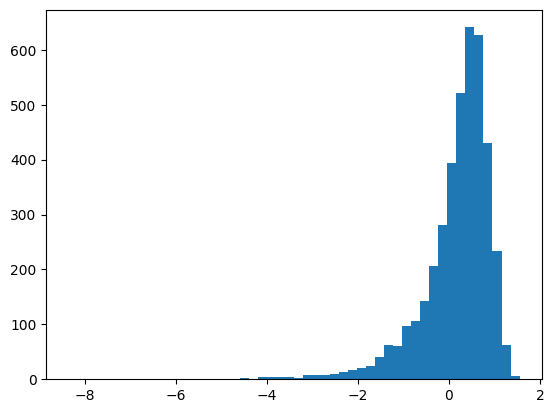

In [21]:
# plot rich people histogram, make bins at least 50, comment on the plot.
plt.hist(np.log(X_rich_log), bins=50)

(array([ 2.,  0.,  0.,  2.,  4.,  3.,  3.,  2.,  3.,  4.,  4.,  4.,  6.,
        11., 10., 16., 18., 24., 27., 41., 34., 54., 42., 58., 52., 51.,
        61., 51., 48., 42., 39., 41., 25., 21., 23., 25., 21.,  9.,  9.,
         7., 11.,  4.,  8.,  7.,  3.,  5.,  0.,  0.,  3.,  1.]),
 array([-2.7297475 , -2.57626099, -2.42277449, -2.26928798, -2.11580148,
        -1.96231497, -1.80882847, -1.65534196, -1.50185546, -1.34836895,
        -1.19488245, -1.04139594, -0.88790944, -0.73442293, -0.58093643,
        -0.42744992, -0.27396342, -0.12047691,  0.03300959,  0.1864961 ,
         0.33998261,  0.49346911,  0.64695562,  0.80044212,  0.95392863,
         1.10741513,  1.26090164,  1.41438814,  1.56787465,  1.72136115,
         1.87484766,  2.02833416,  2.18182067,  2.33530717,  2.48879368,
         2.64228018,  2.79576669,  2.94925319,  3.1027397 ,  3.2562262 ,
         3.40971271,  3.56319921,  3.71668572,  3.87017222,  4.02365873,
         4.17714524,  4.33063174,  4.48411825,  4.63760475,

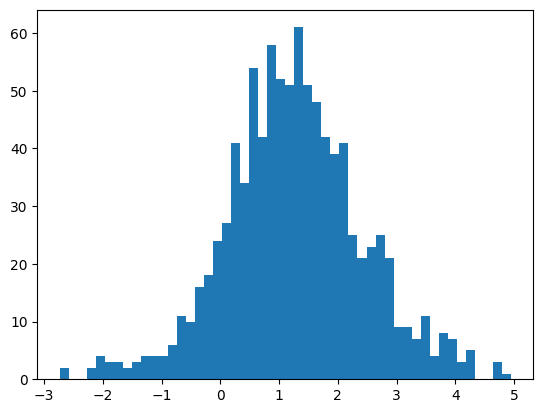

In [22]:
# plot poor people histogram, make bins at least 50, comment on the plot
plt.hist(X_poor, bins=50)

(array([ 2.,  0.,  0.,  2.,  4.,  3.,  3.,  2.,  3.,  4.,  4.,  4.,  6.,
        11., 10., 16., 18., 24., 27., 41., 34., 54., 42., 58., 52., 51.,
        61., 51., 48., 42., 39., 41., 25., 21., 23., 25., 21.,  9.,  9.,
         7., 11.,  4.,  8.,  7.,  3.,  5.,  0.,  0.,  3.,  1.]),
 array([-2.7297475 , -2.57626099, -2.42277449, -2.26928798, -2.11580148,
        -1.96231497, -1.80882847, -1.65534196, -1.50185546, -1.34836895,
        -1.19488245, -1.04139594, -0.88790944, -0.73442293, -0.58093643,
        -0.42744992, -0.27396342, -0.12047691,  0.03300959,  0.1864961 ,
         0.33998261,  0.49346911,  0.64695562,  0.80044212,  0.95392863,
         1.10741513,  1.26090164,  1.41438814,  1.56787465,  1.72136115,
         1.87484766,  2.02833416,  2.18182067,  2.33530717,  2.48879368,
         2.64228018,  2.79576669,  2.94925319,  3.1027397 ,  3.2562262 ,
         3.40971271,  3.56319921,  3.71668572,  3.87017222,  4.02365873,
         4.17714524,  4.33063174,  4.48411825,  4.63760475,

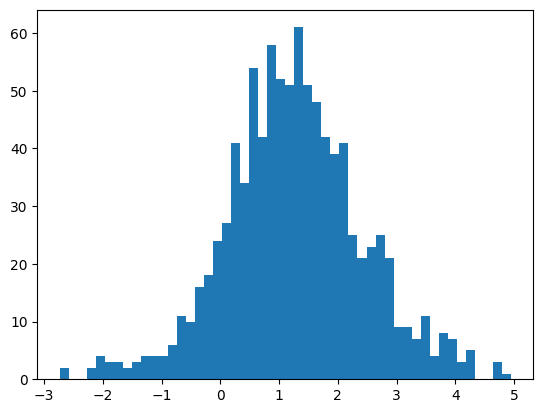

In [25]:
# plot poor people histogram, make bins at least 50, comment on the plot
plt.hist(X_poor_log, bins=50)

In [29]:
# Null hypothesis = mean(X_rich) = mean(X_poor)
# Alternate hypothesis = mean(X_rich) > mean(X_poor)
print(stats.ttest_ind(X_rich, X_poor, permutations=500, alternative="greater"))

# Accept null hypothesis

# Null hypothesis = mean(X_rich) = mean(X_poor)
# Alternate hypothesis = mean(X_rich) < mean(X_poor)
print(stats.ttest_ind(X_rich, X_poor, permutations=500, alternative="less"))

# Reject null hypothesis

Ttest_indResult(statistic=-6.814283097860985, pvalue=1.0)
Ttest_indResult(statistic=-6.814283097860985, pvalue=0.0)


In [30]:
# Null hypothesis = mean(X_rich_log) = mean(X_poor_log)
# Alternate hypothesis = mean(X_rich_log) > mean(X_poor_log)
print(stats.ttest_ind(X_rich_log, X_poor_log, permutations=500, alternative="greater"))

# Accept null hypothesis

# Null hypothesis = mean(X_rich_log) = mean(X_poor_log)
# Alternate hypothesis = mean(X_rich_log) < mean(X_poor_log)
print(stats.ttest_ind(X_rich_log, X_poor_log, permutations=500, alternative="less"))

# Accept null hypothesis

Ttest_indResult(statistic=1.0653065939602715, pvalue=0.172)
Ttest_indResult(statistic=1.0653065939602715, pvalue=0.86)


### After log transformation we can see that both the means are same so both rich and poor are equally likely to get hit by a storm